# Random Sample Imputation

## Aim : RSI is similar to mean/Median imputation but it consists of taking random observations from dataset and we use this to replace NAN values.

# When should it be used?
### When the data is missing completely at random. (MCAR)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_csv('train.csv',usecols =['Age','Fare','Survived'])

In [8]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [10]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [20]:
df['Age'].isnull().sum()

177

In [21]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [22]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [42]:
def impute_nan(df,variable,median):
    df[variable + "_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    #it will have random sample to fill na values
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    #pandas need to have same index in order to merge dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [43]:
median=df.Age.median()

In [44]:
median

28.0

In [45]:
impute_nan(df,'Age',median)

In [46]:
df

,Survived,Age,Fare,Age_median,Age_random,Agerandom
0,0,22.0,7.2500,22.0,22.0,NaN
1,1,38.0,71.2833,38.0,38.0,NaN
2,1,26.0,7.9250,26.0,26.0,NaN
3,1,35.0,53.1000,35.0,35.0,NaN
4,0,35.0,8.0500,35.0,35.0,NaN
...,...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0,NaN
887,1,19.0,30.0000,19.0,19.0,NaN
888,0,NaN,23.4500,28.0,15.0,15.0
889,1,26.0,30.0000,26.0,26.0,NaN


In [47]:
df.drop(['Agerandom'],axis=1,inplace=True)

In [48]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


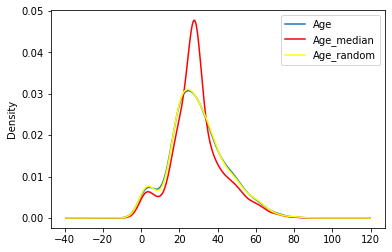

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
df.Age_random.plot(kind='kde',ax=ax,color='yellow')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

# Advantages
1. Easy to implement.
2. There is less distortion in variance.

# Disadvantage
1. Every situation randomness won't work.